# Linear regression with one variable with Numpy

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Load Data

- X = number of claims
- Y = total payment for all the claims in thousands of Swedish Kronor

[데이터 출처](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html)

In [15]:
df = pd.read_csv('data/slr06.csv')
print(str(len(df)) + " number of data")
df.head()

63 number of data


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [16]:
df["X"].shape

(63,)

계산 편의를(concaternate) 위하여 1-dim의 X데이터를 2-dim으로 바꾸어 보겠습니다.

In [23]:
raw_x = df["X"].values.reshape(-1, 1)
y = df["Y"].values

In [26]:
print(df["X"].shape)
print(raw_x.shape)

(63,)
(63, 1)


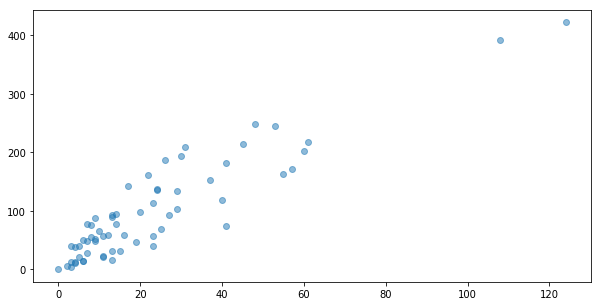

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(raw_x, y, 'o', alpha = 0.5)

In [31]:
raw_x[:5]

array([[108],
       [ 19],
       [ 13],
       [124],
       [ 40]], dtype=int64)

상수항과 x값을 합하여 입력 데이터 X를 만들어 줍니다.

In [30]:
X = np.concatenate( (np.ones((len(raw_x), 1)), raw_x), axis = 1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

w를 초기화 해줍니다.

In [32]:
w = np.random.normal((2,1))
print(w)

[2.07676129 2.17929138]


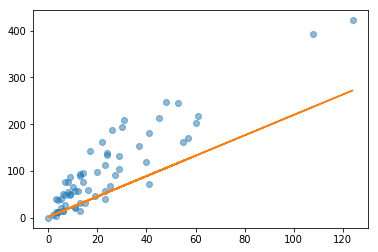

In [34]:
y_predict = np.dot(X, w) # y^ = Xw
plt.plot(raw_x, y, "o", alpha = 0.5)
plt.plot(raw_x, y_predict)

In [39]:
# f(x) = h_theta(x, weight)
def hypothesis_function(X, weight):
    return X.dot(weight)

결과는 1-dim의 vector 형태로 나오게 됩니다.

In [40]:
hypothesis_function(X, w)[:5]

array([237.44023052,  43.48329754,  30.40754925, 272.30889263,
        89.24841656])

$J(w_{0}, w_{1}) = \frac{1}{2m}\Sigma^{m}_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

In [41]:
def cost_function(h, y):
    return (1/2*len(y)) * np.sum((h-y)**2)

In [42]:
h = hypothesis_function(X, w)
cost_function(h, y)

8339994.579797417

아래 gradient_descent 함수에 대한 보충 설명
- $f(x) = h_{\theta}(x)$
- $J(w_{0}, w_{1}) = \frac{1}{2m}\Sigma^{m}_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$
- $\frac{\partial J}{\partial w_{0}} = \frac{1}{m}\Sigma^{m}_{i=1}(w_{1}x^{(i)} + w_{0} - y^{(i)}) $
- $\frac{\partial J}{\partial w_{w}} = \frac{1}{m}\Sigma^{m}_{i=1}(w_{1}x^{(i)} + w_{0} - y^{(i)})x^{(i)} $

In [67]:
# X : input X
# y : output y
# w : weight
# alpha : learning rate
# iteration : the number of iteration
def gradient_descent(X, y, weight, alpha, iterations):    
    w = weight
    m = len(y) # the number of data
    w_list = [w.tolist()]    
    cost = cost_function(hypothesis_function(X, w), y)
    cost_list = [cost]
    
    for i in range(iterations):
        w0 = w[0] - alpha / m * np.sum(np.dot(X, w) - y)
        w1 = w[1] - alpha / m * np.sum((np.dot(X, w) - y) * X[:,1])
        w = np.array([w0, w1])
        
        if i % 10 == 0:
            w_list.append(w.tolist())
            cost = cost_function(hypothesis_function(X, w), y)
            cost_list.append(cost)
            
    return w, w_list, cost_list            

In [68]:
iterations = 10000
alpha = 0.001

w, w_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, w), y)

print("Weight : ", w)
print("Cost : ", cost)

Weight :  [19.88050903  3.41628459]
Cost :  2482110.3949830425


In [69]:
w_list[:10]

[[2.0767612892441285, 2.179291381749789],
 [2.1229556793221076, 3.899883959280711],
 [2.210927884326263, 3.797812747737767],
 [2.3006074936475636, 3.7958763523000334],
 [2.3898348631873407, 3.7939497217917366],
 [2.4786122735177494, 3.7920328069698344],
 [2.566941993710389, 3.79012555883969],
 [2.654826281394298, 3.7882279286537384],
 [2.7422673828136546, 3.7863398679102405],
 [2.8292675328851913, 3.7844613283520454]]

In [70]:
cost_list[:10]

[8339994.579797417,
 2823817.0592016233,
 2799458.2944025565,
 2796265.565108078,
 2793104.955457846,
 2789976.1423203195,
 2786878.8058147356,
 2783812.6292784126,
 2780777.299234373,
 2777772.505359296]

In [76]:
w_list = np.array(w_list)

In [78]:
w_list.transpose().shape

(2, 1001)

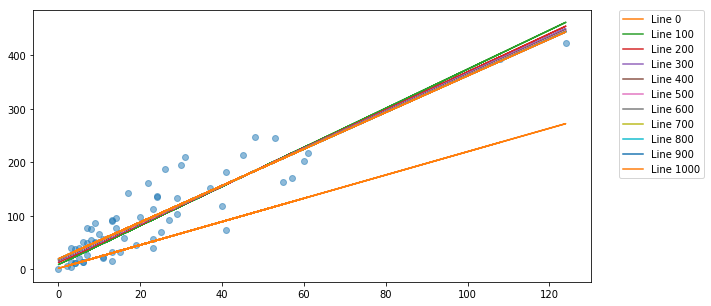

In [91]:
plt.figure(figsize=(10, 5))

y_predict_step = np.dot(X, w_list.transpose())
plt.plot(raw_x, y, "o", alpha = 0.5)
for i in range(0, len(w_list), 100):
    plt.plot(raw_x, y_predict_step[:, i], label = 'Line %d' %i)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

In [86]:
np.dot(X, w_list.transpose()).shape

(63, 1001)